In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
epl = pd.read_csv("epl.csv")
epl.head()

,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
0,Éder,2015-2016,1987,27,Swansea City,Portugal,5500000,4500000,FW,13,...,0,0,11,0,4,0,0,7,9,20
1,Álvaro Morata,2017-2018,1992,25,Chelsea,Spain,44000000,58500000,FW,31,...,4,6,41,0,13,0,0,20,54,59
2,Álvaro Morata,2018-2019,1992,25,Chelsea,Spain,58500000,45000000,FW,16,...,1,0,19,0,8,0,0,6,18,28
3,Álvaro Negredo,2016-2017,1985,30,Middlesbrough,Spain,8250000,6750000,FW,36,...,3,10,45,0,18,0,0,65,175,177
4,Aaron Cresswell,2018-2019,1989,28,West Ham United,England,13200000,9900000,DF,20,...,7,23,2,1,29,0,0,42,25,18


In [3]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 40 columns):
Player                   1468 non-null object
Season                   1468 non-null object
Born                     1468 non-null int64
Age                      1468 non-null int64
Squad                    1468 non-null object
Nation                   1468 non-null object
Previous Market Value    1468 non-null int64
Market Value             1468 non-null int64
Position                 1468 non-null object
App                      1468 non-null int64
Minutes                  1468 non-null int64
Goals                    1468 non-null int64
Passes                   1468 non-null int64
Assists                  1468 non-null int64
Yellow                   1468 non-null int64
Red                      1468 non-null int64
SubOn                    1468 non-null int64
SubOff                   1468 non-null int64
Shots                    1468 non-null int64
SOT                      1468 non

In [4]:
print(epl.columns)
epl.head(2)

Index(['Player', 'Season', 'Born ', 'Age', 'Squad', 'Nation',
       'Previous Market Value', 'Market Value', 'Position', 'App', 'Minutes',
       'Goals', 'Passes', 'Assists', 'Yellow', 'Red', 'SubOn', 'SubOff',
       'Shots', 'SOT', 'HitPost ', 'HeadClear', 'HeadGoal', 'PKScored',
       'FKGoal', 'Offsides', 'ThrBall', 'Misses', 'Corners', 'Crosses',
       'Blocks', 'Interceptions', 'Fouls', 'Last man ', 'Tackles', 'ELG',
       'OwnGoal', 'Clears', 'ABW', 'ABL'],
      dtype='object')


,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,App,...,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
0,Éder,2015-2016,1987,27,Swansea City,Portugal,5500000,4500000,FW,13,...,0,0,11,0,4,0,0,7,9,20
1,Álvaro Morata,2017-2018,1992,25,Chelsea,Spain,44000000,58500000,FW,31,...,4,6,41,0,13,0,0,20,54,59


Label Enconding

In [5]:
epl['Position'].value_counts()

MF    575
DF    527
FW    366
Name: Position, dtype: int64

In [6]:
cleanup_position={"Position":{"DF":1,"MF":2,"FW":3},
                  "Season":{"2015-2016":1,"2016-2017":2,"2017-2018":3,"2018-2019":4}}
epl.replace(cleanup_position,inplace=True)

In [7]:
epl.head()
epl.set_index(["Player","Season"])
#epl.sort_values(by=['Season','Player'],axis=0)

Born   Age                     Squad  \
Player             Season                                         
Éder               1        1987   27              Swansea City   
Álvaro Morata      3        1992   25                   Chelsea   
                   4        1992   25                   Chelsea   
Álvaro Negredo     2        1985   30             Middlesbrough   
Aaron Cresswell    4        1989   28           West Ham United   
                   3        1989   28           West Ham United   
                   1        1989   25           West Ham United   
                   2        1989   26           West Ham United   
Aaron Lennon       1        1987   28                   Everton   
                   2        1987   29                   Everton   
                   4        1987   31                   Burnley   
                   3        1987   30                   Burnley   
Aaron Mooy         3        1990   27         Huddersfield Town   
                   4        1990   27         Huddersfield Town   
Aaron Ramsey       1        1990   24                   Arsenal   
                   2        1990   25                   Arsenal   
                   3        1990   27                   Arsenal   
                   4        1990   27                   Arsenal   
Aaron Wan-Bissaka  4        1997   21            Crystal Palace   
Abdoulaye Doucoure 2        1993   23                   Watford   
                   3        1993   24                   Watford   
                   4        1993   25                   Watford   
Abdul Rahman Baba  1        1994   21                   Chelsea   
Abel Hernández     2        1990   25                 Hull City   
Aboubakar Kamara   4        1995   23                    Fulham   
Adam Clayton       2        1989   27             Middlesbrough   
Adam Forshaw       2        1991   24             Middlesbrough   
Adam Johnson       1        1987   28                Sunderland   
Adam Lallana       1        1988   27                 Liverpool   
                   2        1988   28                 Liverpool   
...                          ...  ...                       ...   
Willian            3        1988   29                   Chelsea   
Willy Boly         4        1991   27                    Wolves   
Winston Reid       1        1988   27           West Ham United   
                   3        1988   29           West Ham United   
                   2        1988   28           West Ham United   
Xherdan Shaqiri    1        1991   23                Stoke City   
                   2        1991   24                Stoke City   
                   3        1991   26                Stoke City   
                   4        1991   26                 Liverpool   
Yan Valery         4        1999   19               Southampton   
Yann M'Vila        1        1990   25                Sunderland   
Yannick Bolasie    1        1989   26            Crystal Palace   
                   2        1989   27                   Everton   
                   3        1989   28                   Everton   
Yaya Toure         2        1983   33           Manchester City   
                   1        1983   32           Manchester City   
                   3        1983   34           Manchester City   
Yerry Mina         4        1994   23                   Everton   
Yohan Benalouane   2        1987   29            Leicester City   
Yohan Cabaye       1        1986   29            Crystal Palace   
                   2        1986   30            Crystal Palace   
                   3        1986   31            Crystal Palace   
Yoshinori Muto     4        1992   26          Newcastle United   
Younes Kaboul      2        1986   30                   Watford   
                   1        1986   29                Sunderland   
Youri Tielemans    4        1997   21            Leicester City   
Yves Bissouma      4        1996   21  Brighton and Hove Albion   
Zanka  

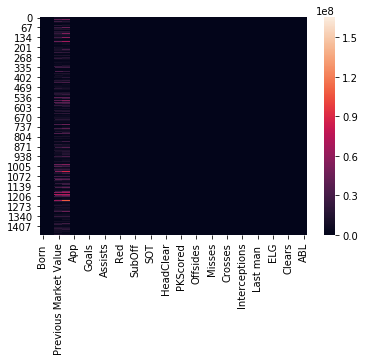

In [8]:
sns.heatmap(epl.drop(['Player', 'Season','Nation','Squad','Position'], axis = 1))

Now I am going to break into Defenders, Midfielders, Forwards

In [9]:
epl.sort_values(by='Position', axis=0, inplace=True)
# set the index to be this and don't drop
# get a list of names
names=epl['Position'].unique().tolist()
# now we can perform a lookup on a 'view' of the dataframe
Fwd = epl.loc[epl.Position==3]
fwd = Fwd.to_csv("forward")

In [10]:
fwd = pd.read_csv('forward')

In [11]:
fwd.head()

,Unnamed: 0,Player,Season,Born,Age,Squad,Nation,Previous Market Value,Market Value,Position,...,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
0,1197,Roberto Firmino,3,1991,25,Liverpool,Brazil,34500000,72000000,3,...,2,18,57,0,65,0,0,9,46,136
1,1198,Roberto Firmino,4,1991,26,Liverpool,Brazil,72000000,72000000,3,...,1,6,38,0,29,0,0,15,30,76
2,1196,Roberto Firmino,2,1991,24,Liverpool,Brazil,31500000,34500000,3,...,3,26,51,0,58,0,0,14,64,142
3,1187,Robbie Brady,1,1992,23,Norwich City,Ireland,2200000,5400000,3,...,3,57,41,1,101,1,0,89,42,26
4,1195,Roberto Firmino,1,1991,23,Liverpool,Brazil,27500000,31500000,3,...,2,16,29,0,67,1,0,12,9,62


In [12]:
Change =(fwd['Market Value']-fwd['Previous Market Value'])

In [14]:
columns =["Born ","Fouls","Last man ","ELG","OwnGoal","Clears","Tackles","ABW","ABL","Interceptions","Blocks","Red","Yellow","Nation","Squad"]
fwd = fwd.assign(Change = Change)  

In [15]:
fwd = fwd.drop(columns=columns,axis=1)


In [16]:
fwd.sort_values(by='Season', axis=0, inplace=True)
# set the index to be this and don't drop
# get a list of names
names=fwd['Season'].unique().tolist()
# now we can perform a lookup on a 'view' of the dataframe
fwd_season = fwd.loc[fwd.Season==3]

In [24]:
fwd_season.head()

,Unnamed: 0,Player,Season,Age,Previous Market Value,Market Value,Position,App,Minutes,Goals,...,HeadGoal,PKScored,FKGoal,Offsides,ThrBall,Misses,Corners,Crosses,Change,GPG
282,1090,Olivier Giroud,3,31,24200000,23200000,3,29,984,7,...,4,0,0,5,5,33,0,3,-1000000,7.113821
281,1089,Oliver McBurnie,3,21,225000,3600000,3,11,269,0,...,0,0,0,0,1,0,0,3,3375000,0.000000
69,1294,Shinji Okazaki,3,31,6300000,5400000,3,27,1328,6,...,1,0,0,9,2,12,0,6,-900000,4.518072
65,1313,Son Heung-Min,3,25,27000000,45000000,3,37,2309,12,...,2,0,0,25,6,42,4,51,18000000,5.197055
271,1177,Richarlison,3,20,2200000,22500000,3,38,2827,5,...,1,0,0,21,2,73,1,51,20300000,1.768659


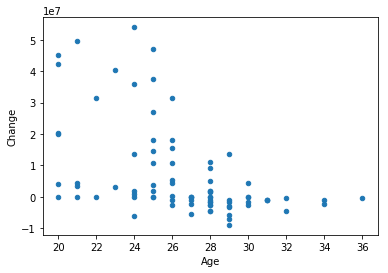

In [19]:
#A plot of Age against change in cost. Which shows the younger you are the wider the price range of a shift could be
fwd_season.plot.scatter(x='Age', y='Change')

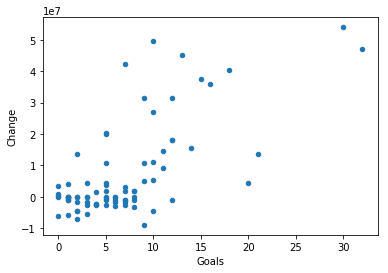

In [18]:
#Goals against Change, it generally tends upward meaning a striker with higher number of goals generally cost more
fwd_season.plot.scatter(x='Goals', y='Change')

In [22]:
#Goals per minutes
GPG = 1000*(fwd_season["Goals"]/fwd_season["Minutes"])
fwd_season = fwd_season.assign(GPG = GPG)

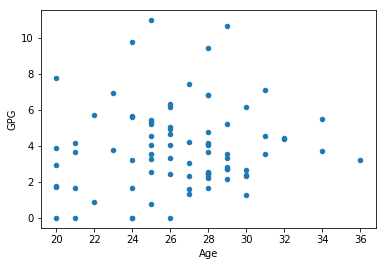

In [30]:
fwd_season.plot.scatter(x='Age', y='GPG')

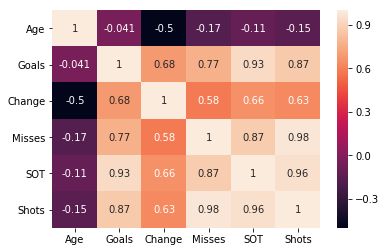

In [31]:
f = (
    fwd_season.loc[:, ['Age', 'Goals', 'Change', 'Misses','SOT','Shots']]
).corr()

sns.heatmap(f, annot=True)

As we can see from above the highly correlated stats are (Goals and SOT) and (Shots and SOT)